In [ ]:
# https://www.analyticsvidhya.com/blog/2017/03/imbalanced-data-classification/

In [ ]:
# Logistic regression : https://medium.com/@satyarepala/understanding-logistic-regression-a-step-by-step-explanation-9a404344964b
# KNN :https://medium.com/swlh/k-nearest-neighbor-ca2593d7a3c4
# Support Vector Machine In Python : https://medium.com/@soumallya160/everything-you-need-to-know-about-support-vector-machine-8e343658c9e7
# LinearSVC : https://medium.com/@akhil0435/linear-svm-classification-40dde297c931
# Gaussian Naive Bayes: https://medium.com/@LSchultebraucks/gaussian-naive-bayes-19156306079b
# Perceptron :
# Hyper tuining technics : https://github.com/KumaarBalbir/HyperTuning / https://www.analyticsvidhya.com/blog/2022/02/a-comprehensive-guide-on-hyperparameter-tuning-and-its-techniques/
# poetry video : https://www.youtube.com/watch?v=V5rKVrVhEh8
# Tree decison https://medium.com/@abhishekjainindore24/all-about-decision-trees-80ea55e37fef
# https://www.kaggle.com/code/kashnitsky/topic-10-gradient-boosting
# 1.https://dataaspirant.com/boosting-algorithms/

In [1]:
##importing a few general use case libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit
import warnings
warnings.filterwarnings('ignore')

## Read data

In [2]:
import pathlib 
import os
import  shutil

dir_path= pathlib.Path.cwd()
print(dir_path)
def read_file():
    dir_folder= pathlib.Path.cwd().parent
    input_path = dir_folder/ "data" / "diabetes"
    file_name = "diabetes.csv"
    df= pd.read_csv(os.path.join(input_path,file_name))
    return df

df = read_file()


c:\Abdelouaheb\perso\Ph\machine_learning_pipeline\diabetes


## Supervised learning Algorithms

### EDA

#### Data Shape

In [3]:
# Data shape and Variable types
#print(df.head())
print("#"*50)
print(df.info())


##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


#### Missing value

In [4]:
# Missing values count
df.isnull().sum()
# Missing values percentage
round(df.isnull().sum()/df.shape[0],2)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [5]:
# Balanced or Unbalanced data 
round(df["Outcome"].value_counts()/df.shape[0]*100,0).astype(int).astype(str) + "%"

Outcome
0    65%
1    35%
Name: count, dtype: object

### Unbalnced data 

In [4]:
import pandas as pd

def check_data_balance(df, target_column):
    """
    Checks if the target variable in the DataFrame has balanced data.
    
    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - target_column (str): The name of the target variable column.
    
    Returns:
    - dict: A dictionary with the balance status and class distribution.
    """
    if target_column not in df.columns:
        return {"error": f"Column '{target_column}' not found in the DataFrame."}

    # Calculate the class distribution
    class_counts = df[target_column].value_counts()
    total_samples = len(df)

    # Calculate percentages for each class
    class_distribution = (class_counts / total_samples) * 100

    # Define a threshold for imbalance (e.g., one class below 30%)
    threshold = 30.0
    is_balanced = all(class_distribution >= threshold)

    return {
        "is_balanced": is_balanced,
        "class_distribution": class_distribution.to_dict()
    }


In [9]:
result = check_data_balance(df, 'Outcome')
print(result)

{'is_balanced': True, 'class_distribution': {0: 65.10416666666666, 1: 34.89583333333333}}


In [ ]:
# https://www.kaggle.com/discussions/general/226387
## Techniques to handle Imbalanced data
# Under Sampling
# Over Sampling
# SMOTE
# Random Over Sampling
#Balanced Bagging Classifier
# **Class Weights: ** Some algorithm allows you to assign different weights to class to improve training. Adasyn:-


In [ ]:
import imblearn 
from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler(sampling_strategy=0.5)

In [ ]:
from imblearn.over_sampling import SMOTE
X_resampled, y_resampled = SMOTE().fit_resample(X, y)

In [13]:
# Import necessary library
from imblearn.over_sampling import ADASYN
from collections import Counter

# Instantiate ADASYN
ada = ADASYN(random_state=0)




#### Numerical varaibles check 

In [6]:
# univarie analysis 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Outliers check

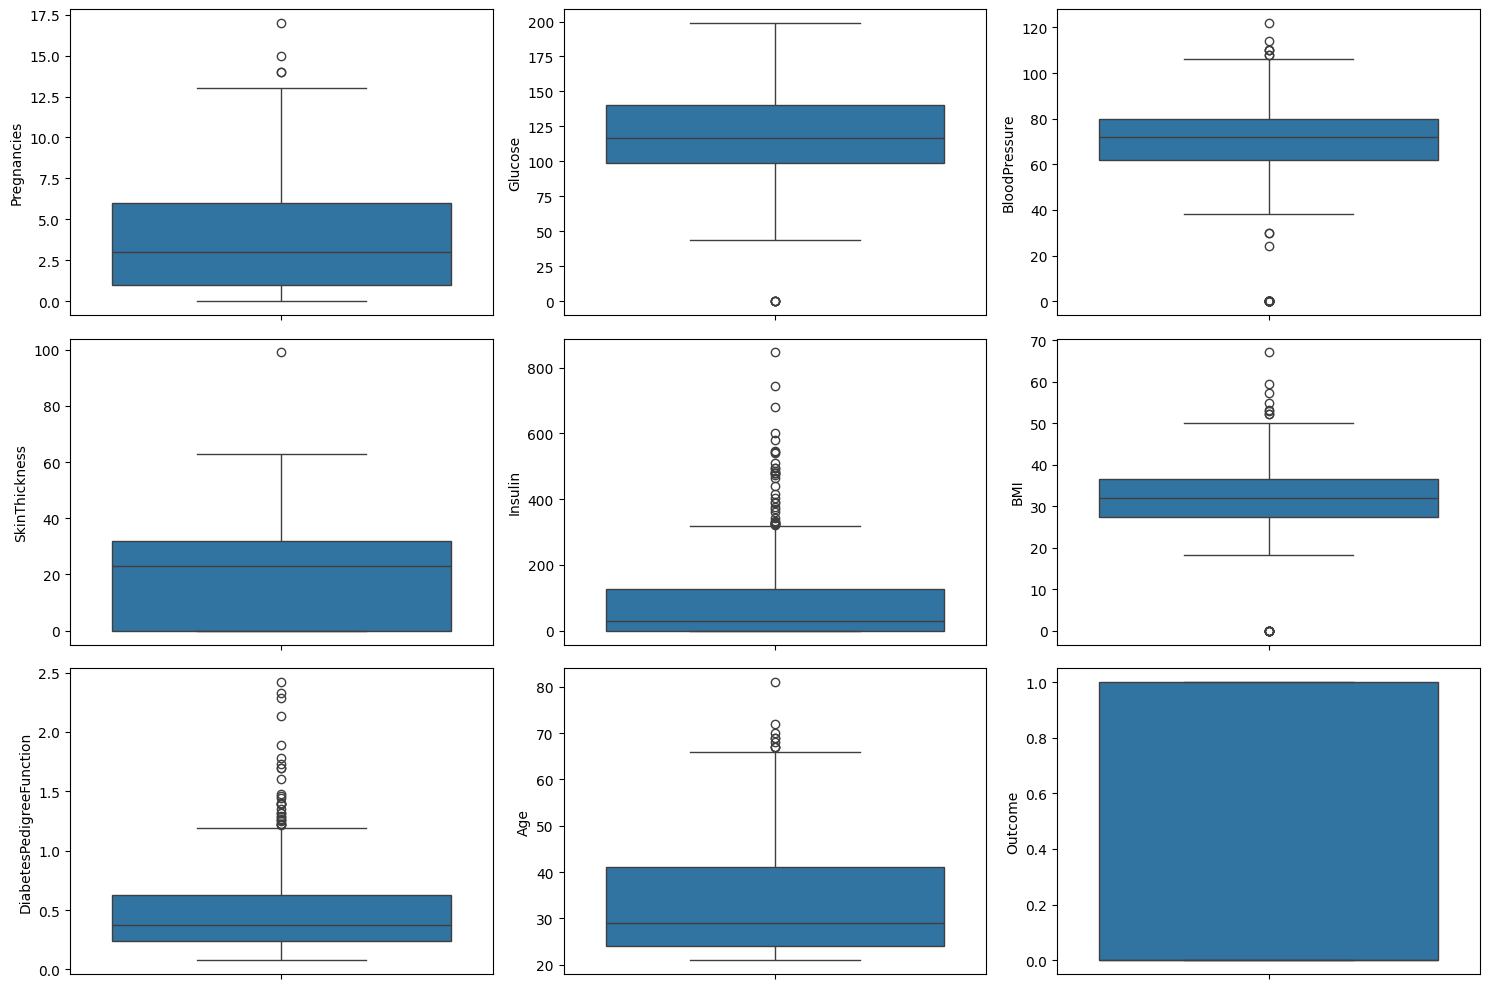

In [7]:
# Outliers
import seaborn as sns 
fig, axes = plt.subplots(3,3, figsize=(15,10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i,3)
    sns.boxplot(data=df,y=col,ax=axes[row, col_position])
    plt.tight_layout()
plt.show()


#### Correlations

In [14]:
# importing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [20]:
# Lets calculate mutual information then move on to visualize correlation and mutual information

tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

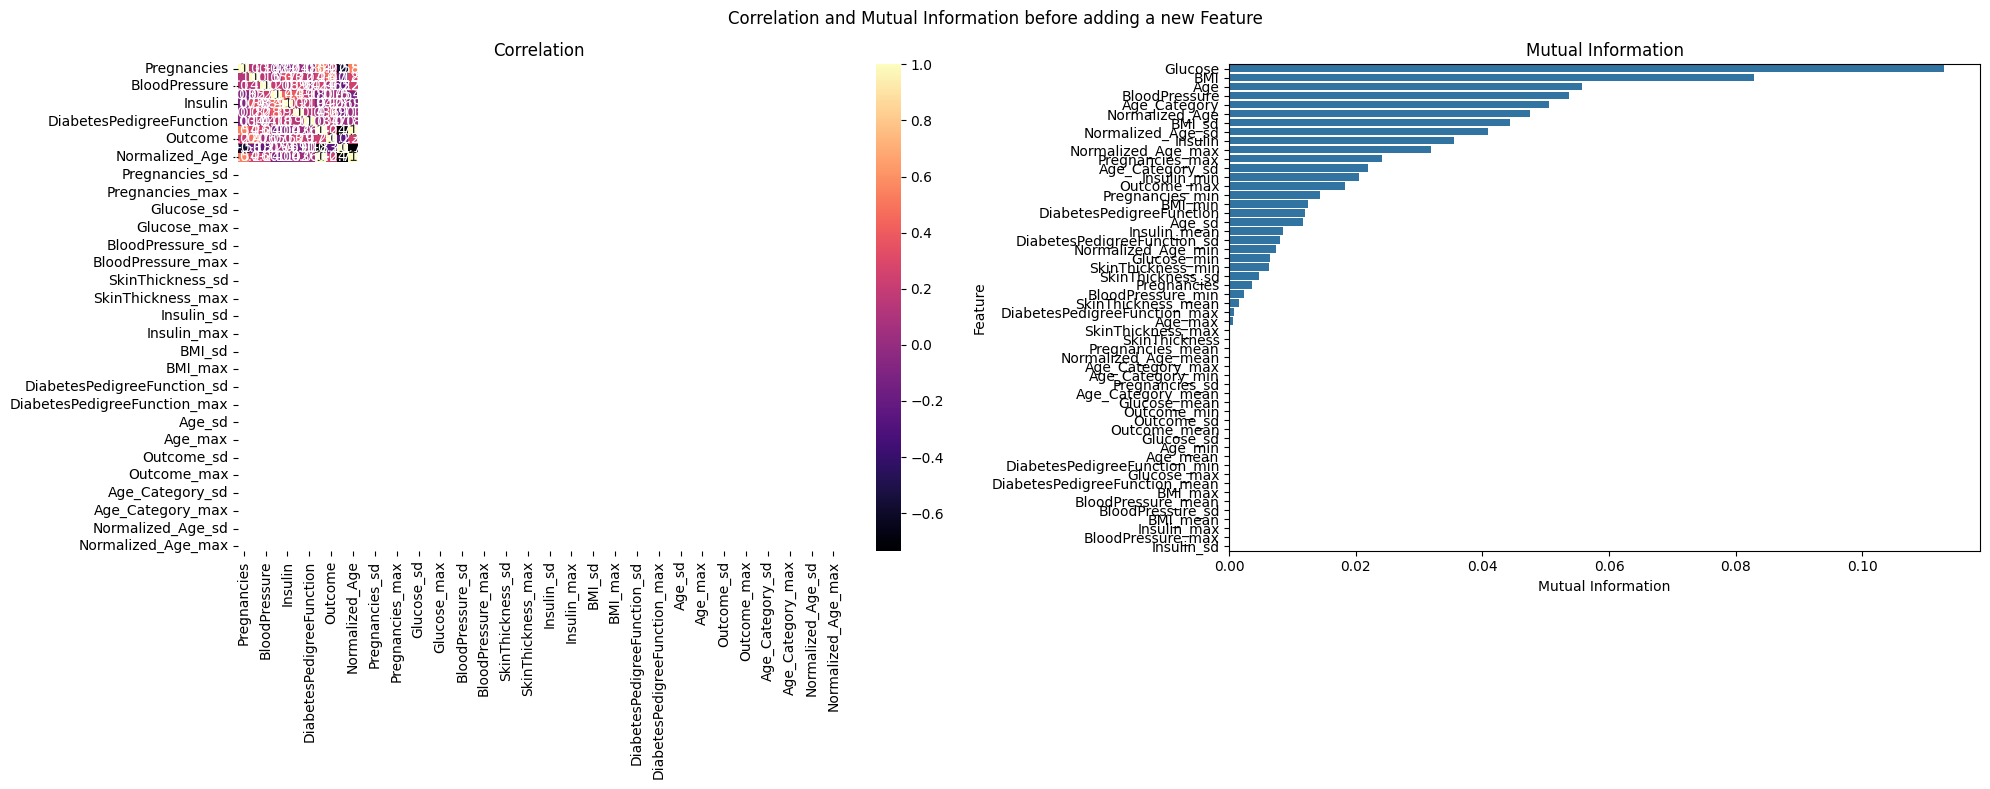

In [21]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information before adding a new Feature')
plt.tight_layout()
plt.show()

### Feature Enegineering

In [6]:
max = df['Age'].max()
min = df['Age'].min()
print(max,min)

81 21


In [7]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
bins=[20,36,51,66,float('inf')]  # Define bin edges
labels=['Young Adults','Middle-Aged Adults','Older Adults','Seniors']  # Define labels
df['Age_Category']=pd.cut(df['Age'],bins=bins,labels=labels, right=True)
df['Age_Category']=pd.cut(df['Age'],bins=bins,labels=labels, right=True)
# Initialize the encoder
on = OrdinalEncoder()

le=LabelEncoder()
df['Age_Category']=le.fit_transform(df['Age_Category']) # Encoding categorical column
df['Normalized_Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

#### Check new Variable

In [15]:
# df['Age_Category'].value_counts()
# def preprocess_origin_cols(df):
#     df["Age_Category"] = df["Age_Category"].map({0: "tenn",1: "adult", 2: "young", 3: "senior"})
#     return df
# data_tr = preprocess_origin_cols(data)
# data_tr.head()

#### Outliers

In [13]:
# https://medium.com/@Coursesteach/supervised-learning-with-scikit-learn-part-11-removing-outliers-with-scikit-learn-59d6a2051d02
# Outliers
from sklearn.base import BaseEstimator, TransformerMixin
class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        # Check if X is a DataFrame or NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # When X is a NumPy array, we need to handle columns by index
            data = pd.DataFrame(X)  # Convert it to DataFrame to make indexing easier
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Remove outliers
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        
        return data.values


In [14]:
# replace outliers with bound 
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplaceBound(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        """
        Initialize the OutlierRemover with the columns to check for outliers
        and the IQR threshold for detecting them.
        
        Parameters:
        cols (list): List of column indices or names to check for outliers.
        threshold (float): Multiplier for the IQR to define outliers. Typically 1.5 or 3.
        """
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self  # No fitting necessary for outlier removal
    
    def transform(self, X):
        # Check if X is a DataFrame or a NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # Convert NumPy array to DataFrame to handle columns by name
            data = pd.DataFrame(X)
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Replace outliers with the upper or lower bound
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            
            # Replace outliers in the data
            data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])  # Replace high outliers with the upper bound
            data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])  # Replace low outliers with the lower bound
        
        return data.values  # Return as a NumPy array for compatibility with scikit-learn



In [8]:
import numpy as np
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

class OutlierReplaceWithMedian(BaseEstimator, TransformerMixin):
    def __init__(self, cols=None, threshold=1.5):
        """
        Initialize the OutlierRemover with the columns to check for outliers
        and the IQR threshold for detecting them.
        
        Parameters:
        cols (list): List of column indices or names to check for outliers.
        threshold (float): Multiplier for the IQR to define outliers. Typically 1.5 or 3.
        """
        self.cols = cols
        self.threshold = threshold
    
    def fit(self, X, y=None):
        return self  # No fitting necessary for outlier removal
    
    def transform(self, X):
        # Check if X is a DataFrame or a NumPy array
        if isinstance(X, pd.DataFrame):
            data = X.copy()
        else:
            # Convert NumPy array to DataFrame to handle columns by name
            data = pd.DataFrame(X)
        
        cols = self.cols if self.cols is not None else data.columns
        
        # Replace outliers with the median value
        for col in cols:
            if isinstance(col, int):  # If index is passed
                col = data.columns[col]  # Convert index to column name
            
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - self.threshold * IQR
            upper_bound = Q3 + self.threshold * IQR
            
            # Compute the median of the column
            median = data[col].median()

            # Replace outliers with the median
            data[col] = np.where(data[col] > upper_bound, median, data[col])  # Replace high outliers with the median
            data[col] = np.where(data[col] < lower_bound, median, data[col])  # Replace low outliers with the median
        
        return data.values  # Return as a NumPy array for compatibility with scikit-learn


#### add_stat_columns

In [10]:
def add_stat_columns(df):
    numerric_clos = df.select_dtypes(include=['number']).columns
    
    for col in numerric_clos:
        mean_col = f"{col}_mean"
        sd_col = f"{col}_sd"
        min_col = f"{col}_min"
        max_col = f"{col}_max"
        df[mean_col] = df[col].mean()
        df[sd_col] = df[col].std()
        df[min_col] = df[col].min()
        df[max_col] = df[col].max()
    
    return df

In [11]:
df=add_stat_columns(df)

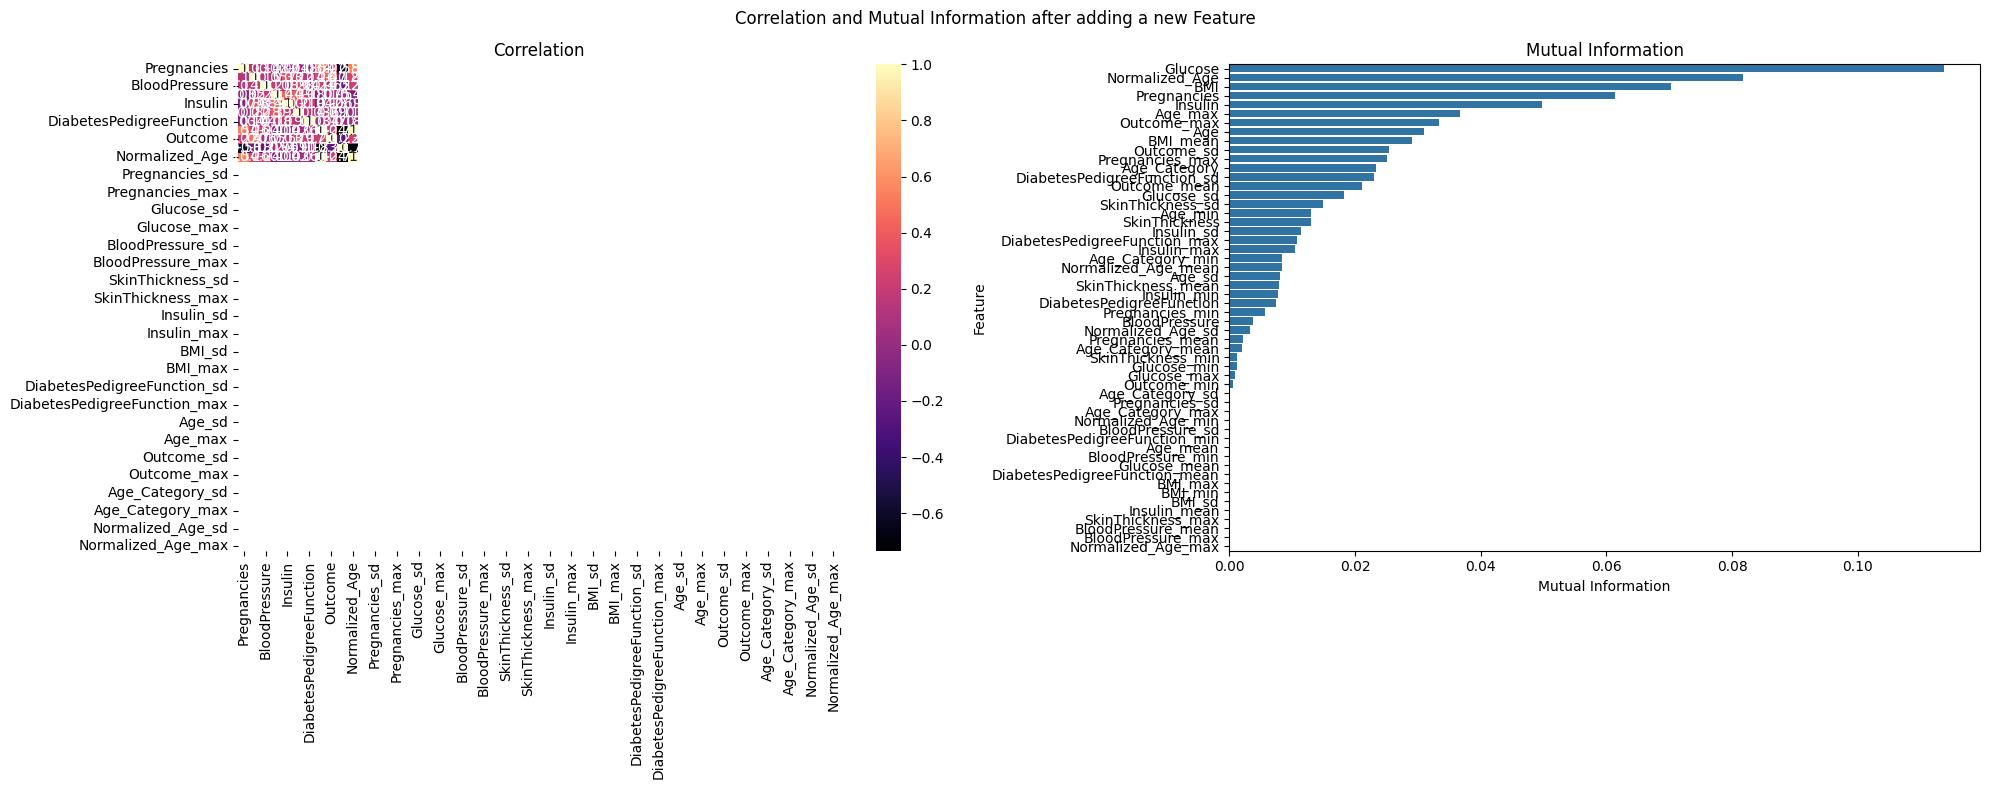

In [15]:
tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information after adding a new Feature')
plt.tight_layout()
plt.show()

#### Encoding Techniques

In [ ]:
#https://www.kaggle.com/discussions/general/330406
# Different techniques of Encoding Categorical Variables:
# Label Encoding
# OHE (One Hot Encoding)
# Nominal Encoding
# Ordinal Encoding
# Frequency encoding
# Binary Encoding
# Count frequency Encoding
# Hash Encoding
# Mean Encoding
# Mapping
# Target Encoding
# Cat boost Encoders

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Example data
data = ['cat', 'dog', 'mouse', 'cat', 'mouse']
label_encoder = LabelEncoder()
encoded_data = label_encoder.fit_transform(data)
print("Label Encoded:", encoded_data)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Example data
data = pd.DataFrame({'animal': ['cat', 'dog', 'mouse', 'cat', 'mouse']})
ohe = OneHotEncoder(sparse=False)
encoded_data = ohe.fit_transform(data[['animal']])
print("One Hot Encoded:\n", encoded_data)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Example data
data = [['low'], ['medium'], ['high'], ['medium'], ['low']]
ordinal_encoder = OrdinalEncoder(categories=[['low', 'medium', 'high']])
encoded_data = ordinal_encoder.fit_transform(data)
print("Ordinal Encoded:", encoded_data)

In [ ]:
import pandas as pd

# Example data
data = pd.DataFrame({'animal': ['cat', 'dog', 'mouse', 'cat', 'mouse']})
frequency = data['animal'].value_counts() / len(data)
data['frequency_encoded'] = data['animal'].map(frequency)
print("Frequency Encoded:\n", data)

In [ ]:
from category_encoders import BinaryEncoder
import pandas as pd

# Example data
data = pd.DataFrame({'animal': ['cat', 'dog', 'mouse', 'cat', 'mouse']})
binary_encoder = BinaryEncoder(cols=['animal'])
encoded_data = binary_encoder.fit_transform(data)
print("Binary Encoded:\n", encoded_data)

In [ ]:
import pandas as pd

# Example data
data = pd.DataFrame({'animal': ['cat', 'dog', 'mouse', 'cat', 'mouse']})
counts = data['animal'].value_counts()
data['count_encoded'] = data['animal'].map(counts)
print("Count Frequency Encoded:\n", data)

In [ ]:
from category_encoders import HashingEncoder
import pandas as pd

# Example data
data = pd.DataFrame({'animal': ['cat', 'dog', 'mouse', 'cat', 'mouse']})
hash_encoder = HashingEncoder(cols=['animal'], n_components=8)
encoded_data = hash_encoder.fit_transform(data)
print("Hash Encoded:\n", encoded_data)

In [ ]:
import pandas as pd

# Example data
data = pd.DataFrame({'animal': ['cat', 'dog', 'mouse', 'cat', 'mouse'],
                     'target': [1, 0, 1, 1, 0]})
mean_encoded = data.groupby('animal')['target'].mean()
data['mean_encoded'] = data['animal'].map(mean_encoded)
print("Mean Encoded:\n", data)

In [ ]:
# Example data
data = ['low', 'medium', 'high', 'medium', 'low']
mapping = {'low': 1, 'medium': 2, 'high': 3}
encoded_data = [mapping[item] for item in data]
print("Mapped Encoding:", encoded_data)

In [ ]:
from category_encoders import TargetEncoder
import pandas as pd

# Example data
data = pd.DataFrame({'animal': ['cat', 'dog', 'mouse', 'cat', 'mouse'],
                     'target': [1, 0, 1, 1, 0]})
target_encoder = TargetEncoder(cols=['animal'])
encoded_data = target_encoder.fit_transform(data['animal'], data['target'])
print("Target Encoded:\n", encoded_data)

In [ ]:
from category_encoders import CatBoostEncoder
import pandas as pd

# Example data
data = pd.DataFrame({'animal': ['cat', 'dog', 'mouse', 'cat', 'mouse'],
                     'target': [1, 0, 1, 1, 0]})
catboost_encoder = CatBoostEncoder(cols=['animal'])
encoded_data = catboost_encoder.fit_transform(data['animal'], data['target'])
print("CatBoost Encoded:\n", encoded_data)

### Models

#### Target varaibe

In [16]:
from sklearn.model_selection import train_test_split
x= df.drop(columns='Outcome')
y= df['Outcome']

#### Pipeline and Split

In [17]:
#importing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
import time
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [18]:
lm=[] #Storing classification reports
cr=[] #Storing classification reports
cm_t=[] # Storing Confusion matrix for Training set
cm=[] # Storing Confusion matrix for Testing set
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

##### Split technics

In [5]:
#https://medium.com/@tubelwj/five-methods-for-data-splitting-in-machine-learning-27baa50908ed
# 1. Random Splitting
# 2. Stratified Splitting 
# 3. Time Series Splitting 
# 4. K-Fold Cross-Validation Splitting
# 5. Leave-One-Out Cross-Validation Splitting

In [19]:
x_t,x_te,y_t,y_te= train_test_split(x,y,test_size=.25,random_state=20, stratify=y)

##### Pipelines

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
#numerics = ['int64', 'float64']
#num_data = data_tr.select_dtypes(include=numerics)

num_pipeline = Pipeline([
        ('outlier_remover', OutlierReplaceWithMedian(cols=[0, 2, 4, 5, 6, 7, 8, 9], threshold=1.5)),
        #('inputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()
         )
])

X_train_scaler = num_pipeline.fit_transform(x_t)
X_test_scaler = num_pipeline.fit_transform(x_te)

In [75]:
# lgc= LogisticRegression()
# training_start = time.perf_counter()
# # model=lgc.fit(x_t,y_t)
# # with scaler
# model=lgc.fit(X_train_scaler,y_t)
# training_end = time.perf_counter()
# prediction_start= time.perf_counter()
# y_pred =model.predict(X_test_scaler)
# y_pred_proba = model.predict_proba(x_te)
# prediction_end= time.perf_counter()
# #acc_Lgc= round(lgc.score(x_t,y_t)* 100, 2)
# acc_Lgc_train = model.score(X_train_scaler,y_t)
# acc_Lgc_test = model.score(X_test_scaler, y_te)
# Lgc_train_time = training_end-training_start
# Lgc_prediction_time = prediction_end-prediction_start
# #print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy is: %3.2f" % (acc_Lgc))
# print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Train set is: %3.2f" %(acc_Lgc_train)+ "%")
# print("Scikit-Learn's LogisticRegression Classifier's prediction accuracy in Test set is: %3.2f" %(acc_Lgc_test)+ "%")
# print("Time consumed for training: %4.3f seconds" % (Lgc_train_time))
# print("Time consumed for prediction: %6.5f seconds" % (Lgc_prediction_time))


#### LogisticRegression

In [31]:
from sklearn.model_selection import GridSearchCV
reg=LogisticRegression(max_iter=10000) 
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
# Define hyperparameter grid for logistic regression
# grid_params = {
#     'C': [0.01, 0.1, 1, 10, 21],         # Regularization strength
#     'penalty': ['l1', 'l2', 'elasticnet'], # Regularization types
#     'solver': ['saga', 'liblinear'],       # Solvers for optimization
#     'max_iter': [1000, 5000, 10000]        # Maximum iterations for convergence
# }



# # Initialize the GridSearchCV object
# nreg = GridSearchCV(estimator=reg,                 # Logistic regression model
#     param_grid=grid_params,        # Parameter grid for hyperparameter tuning
#     cv=10,                          # Number of cross-validation folds
#     n_jobs=-1,                     # Use all available processors
#     verbose=1                      # Verbosity level for updates
# )
#https://medium.com/analytics-vidhya/hyper-parameter-tuning-gridsearchcv-vs-randomizedsearchcv-499862e3ca5
#nreg.fit(x_t,y_t)
nreg.fit(X_train_scaler,y_t)
print(nreg.best_params_)
print(nreg.best_score_)
nregg=nreg.best_estimator_
predt1=nregg.predict(X_train_scaler)
pred1=nregg.predict(X_test_scaler)
lm.append("LogisticRegression")
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

Fitting 10 folds for each of 90 candidates, totalling 900 fits
{'C': 0.1, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}
0.7588021778584392


In [32]:
acc

[0.8125, 0.796875, 0.796875, 0.796875]

#### KNeighborsClassifier

In [28]:
knn=KNeighborsClassifier() 
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nknn.fit(X_train_scaler,y_t)
print(nknn.best_params_)
print(nknn.best_score_)
nknn=nknn.best_estimator_
predt1=nknn.predict(X_train_scaler)
pred1=nknn.predict(X_test_scaler)
lm.append("KNeighborsClassifier")
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'n_neighbors': 29}
0.7344525105868118


  File "C:\Users\ASUS TUF\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


#### SVC

In [29]:
from sklearn.svm import SVC 
svc = SVC()
params={"C" : [0.1, 1, 10, 100, 1000] ,"kernel":['linear', 'rbf', 'poly'],"degree" : [0, 1, 2, 3, 4, 5, 6],"gamma":[0.1, 1, 10, 100]}
svcc=RandomizedSearchCV(svc,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
svcc.fit(X_train_scaler,y_t)
print(svcc.best_params_)
print(svcc.best_score_)

svcc=svcc.best_estimator_
predt1=svcc.predict(X_train_scaler)
pred1=svcc.predict(X_test_scaler)
lm.append("SVC")
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'kernel': 'linear', 'gamma': 10, 'degree': 2, 'C': 0.1}
0.7502117362371445


In [80]:
# def plot_svm_boundary(model,X,y):
    
#     X = X
#     y = y.values
    
#     # Scatter Plot
#     plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
#     # plot the decision function
#     ax = plt.gca()
#     xlim = ax.get_xlim()
#     ylim = ax.get_ylim()

#     # create grid to evaluate model
#     xx = np.linspace(xlim[0], xlim[1], 30)
#     yy = np.linspace(ylim[0], ylim[1], 30)
#     YY, XX = np.meshgrid(yy, xx)
#     xy = np.vstack([XX.ravel(), YY.ravel()]).T
#     Z = model.decision_function(xy).reshape(XX.shape)

#     # plot decision boundary and margins
#     ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
#                linestyles=['--', '-', '--'])
#     # plot support vectors
#     ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
#                linewidth=1, facecolors='none', edgecolors='k')
#     plt.show()

In [81]:
# plt.subplot(2,2,1)
# plot_svm_boundary(svcc_te,X_train_scaler,y_t)

#### GaussianNB

In [30]:
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
params={'var_smoothing': np.logspace(0,-9, num=100)}
gaussh=RandomizedSearchCV(gauss,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
gaussh.fit(X_train_scaler,y_t)
print(gaussh.best_params_)
print(gaussh.best_score_)

gausshb=gaussh.best_estimator_
predt1=gausshb.predict(X_train_scaler)
pred1=gausshb.predict(X_test_scaler)
lm.append("GaussianNB")
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'var_smoothing': 1.0}
0.708529945553539


#### Perceptron

In [31]:
from sklearn.linear_model import Perceptron
per = Perceptron()
params={'max_iter': [40], 'eta0':[0.1], 'random_state':[1]}
perh=RandomizedSearchCV(per,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
perh.fit(X_train_scaler,y_t)
print(perh.best_params_)
print(perh.best_score_)
lm.append("Perceptron")
perb=perh.best_estimator_
predt1=perb.predict(X_train_scaler)
pred1=perb.predict(X_test_scaler)
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'random_state': 1, 'max_iter': 40, 'eta0': 0.1}


0.6617664851784635


#### SGDClassifier

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the model and parameter grid
sgd = SGDClassifier(max_iter=10000, random_state=42)
params = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': list(np.logspace(-4, 0, 20)),  # Regularization strength
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': list(np.logspace(-3, 0, 10))  # Initial learning rate
}

# RandomizedSearchCV for hyperparameter tuning
nsgd = RandomizedSearchCV(
    sgd, 
    param_distributions=params, 
    scoring='accuracy', 
    n_jobs=-1, 
    cv=10, 
    random_state=42
)

# Fit the model
nsgd.fit(X_train_scaler, y_t)

# Output the best parameters and best score
print(nsgd.best_params_)
print(nsgd.best_score_)

# Update to the best estimator
nsgd = nsgd.best_estimator_

# Predictions
predt1 = nsgd.predict(X_train_scaler)
pred1 = nsgd.predict(X_test_scaler)

# Metrics collection
lm.append("SGDClassifier")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))


{'penalty': 'l1', 'loss': 'squared_hinge', 'learning_rate': 'constant', 'eta0': 0.0021544346900318843, 'alpha': 0.03359818286283781}
0.7588929219600726


#### DecisionTreeClassifier

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize Decision Tree Classifier
tree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter space
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, 21)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}

# Randomized search with cross-validation
ntree = RandomizedSearchCV(tree, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
ntree.fit(X_train_scaler, y_t)

# Best parameters and best score
print(ntree.best_params_)
print(ntree.best_score_)

# Use the best estimator
ntree = ntree.best_estimator_

# Predictions
predt1 = ntree.predict(X_train_scaler)
pred1 = ntree.predict(X_test_scaler)

# Metrics calculation
lm.append("DecisionTreeClassifier")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))


{'splitter': 'best', 'min_samples_split': 9, 'min_samples_leaf': 8, 'max_depth': 5, 'criterion': 'gini'}
0.7606775559588627


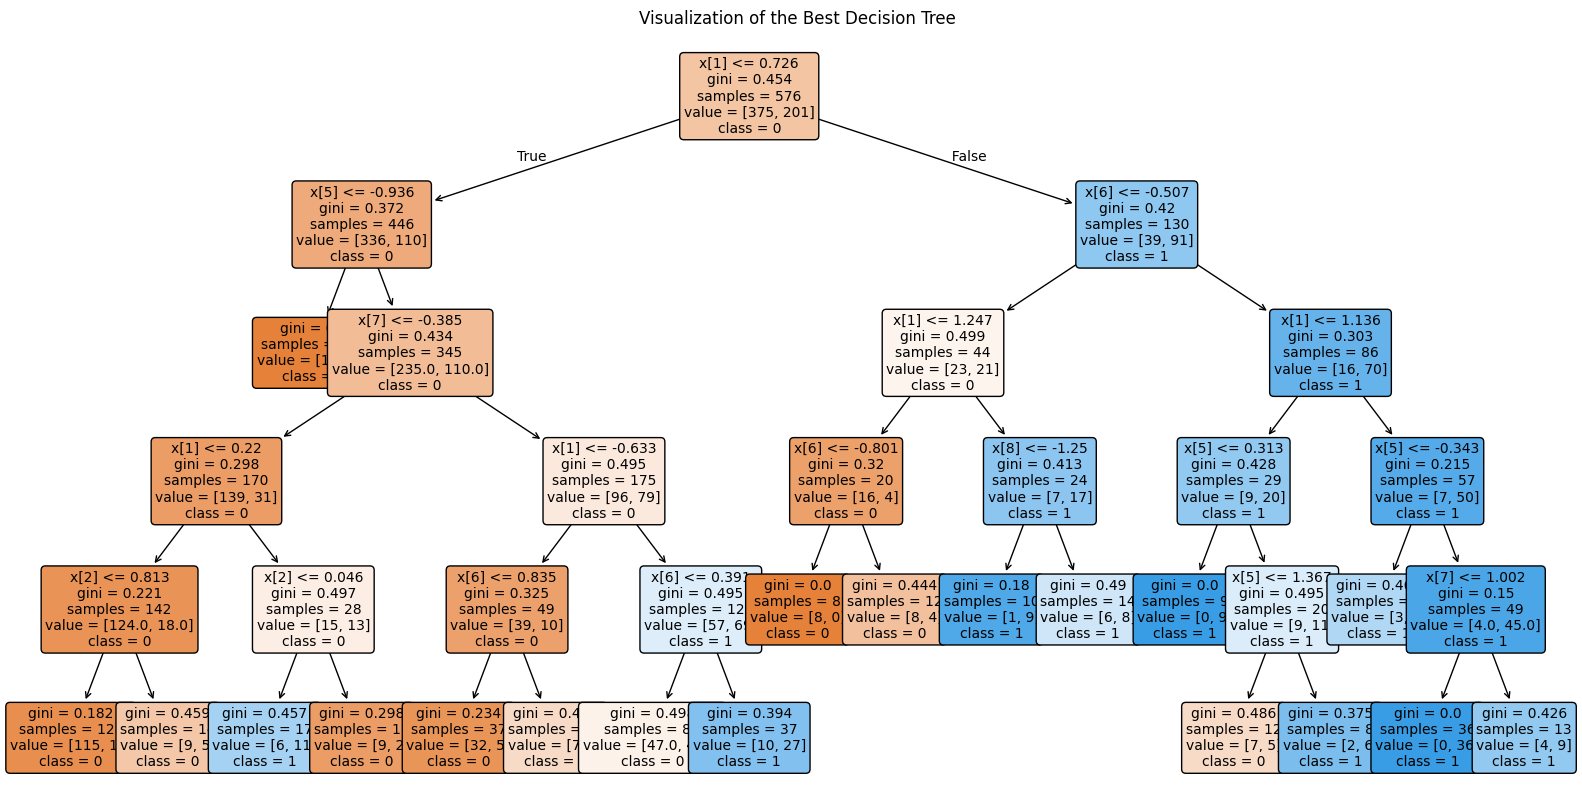

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualize the best decision tree
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(
    ntree, 
    feature_names=X_train_scaler.columns if hasattr(X_train_scaler, 'columns') else None,
    class_names=[str(cls) for cls in ntree.classes_],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Visualization of the Best Decision Tree")
plt.show()


#### RandomForestClassifier

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize Random Forest Classifier
forest = RandomForestClassifier(random_state=42)

# Define hyperparameter space
params = {
    'n_estimators': list(range(50, 500, 50)),  # Number of trees
    'max_depth': list(range(1, 21)),  # Maximum depth of the trees
    'min_samples_split': list(range(2, 20)),  # Minimum samples required to split a node
    'min_samples_leaf': list(range(1, 20)),  # Minimum samples required in a leaf node
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Randomized search with cross-validation
nforest = RandomizedSearchCV(forest, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
nforest.fit(X_train_scaler, y_t)

# Best parameters and best score
print(nforest.best_params_)
print(nforest.best_score_)

# Use the best estimator
nforest = nforest.best_estimator_

# Predictions
predt1 = nforest.predict(X_train_scaler)
pred1 = nforest.predict(X_test_scaler)

# Metrics calculation
lm.append("RandomForestClassifier")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))


{'n_estimators': 50, 'min_samples_split': 14, 'min_samples_leaf': 16, 'max_depth': 16, 'criterion': 'entropy'}
0.7413793103448276


<function matplotlib.pyplot.show(close=None, block=None)>

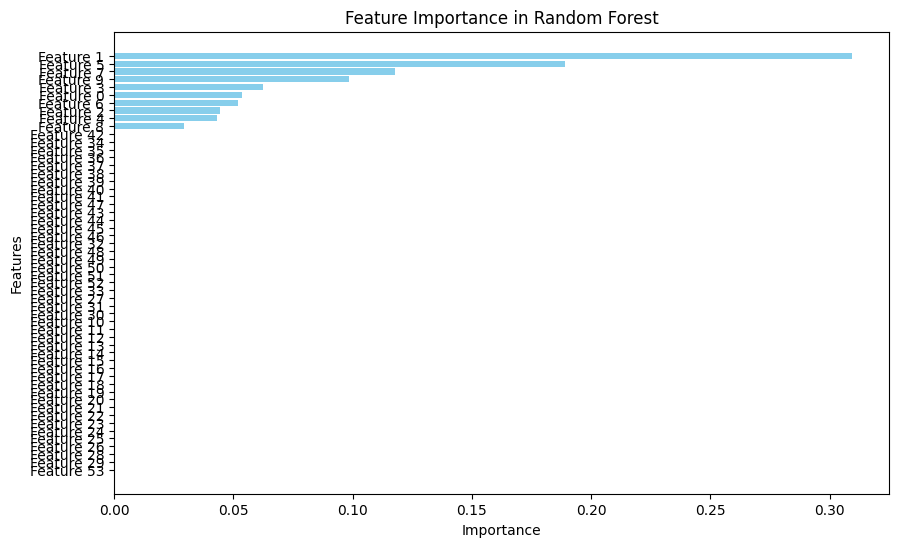

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances from the Random Forest model
importances = nforest.feature_importances_
feature_names = X_train_scaler.columns if hasattr(X_train_scaler, 'columns') else [f'Feature {i}' for i in range(len(importances))]

# Create a DataFrame for feature importance
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features on top
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show


### Boosting

In [37]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Initialize AdaBoost Classifier with Decision Tree as base estimator
adaboost = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(),
    random_state=42
)

# Define hyperparameter space
params = {
    'n_estimators': list(range(10, 100, 10)),  # Number of boosting rounds
    'learning_rate': np.linspace(0.01, 1.0, 10),  # Learning rate
    'estimator__max_depth': list(range(1, 100)),  # Depth of base estimators
    'estimator__min_samples_split': list(range(2, 200)),  # Minimum samples to split
    'estimator__min_samples_leaf': list(range(1, 200))  # Minimum samples in a leaf
}

# Randomized search with cross-validation
adaboost_cv = RandomizedSearchCV(adaboost, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
adaboost_cv.fit(X_train_scaler, y_t)

# Best parameters and best score
print(adaboost_cv.best_params_)
print(adaboost_cv.best_score_)

# Use the best estimator
adaboost_best = adaboost_cv.best_estimator_

# Predictions
predt1 = adaboost_best.predict(X_train_scaler)
pred1 = adaboost_best.predict(X_test_scaler)

# Metrics calculation
lm.append("AdaBoostClassifier")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))


{'n_estimators': 70, 'learning_rate': 0.01, 'estimator__min_samples_split': 126, 'estimator__min_samples_leaf': 71, 'estimator__max_depth': 32}
0.7552934059286147


In [38]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the model parameters
params = {
    'objective': 'binary:logistic',  # Objective function for classification
    'learning_rate': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of a tree
    'n_estimators': 100,  # Number of boosting rounds
    'subsample': 0.8,  # Fraction of samples to be used for fitting
    'colsample_bytree': 0.8,  # Fraction of features to be used for each tree
    'reg_alpha': 0.1,  # L1 regularization term
    'reg_lambda': 0.1  # L2 regularization term
}

# Initialize XGBoost Classifier
xgb = XGBClassifier(**params, random_state=42)

# Define hyperparameter space for Randomized Search
param_space = {
    'learning_rate': np.linspace(0.01, 1.0, 10),  # Learning rate
    'max_depth': list(range(1, 100)),  # Maximum depth of trees
    'min_child_weight': list(range(1, 200)),  # Minimum sum of instance weight (hessian) needed in a child
    'subsample': np.linspace(0.5, 1.0, 5),  # Subsample ratio of the training instances
    'colsample_bytree': np.linspace(0.5, 1.0, 5),  # Subsample ratio of columns when constructing each tree
    'reg_alpha': np.logspace(-5, 1, 5),  # L1 regularization term
    'reg_lambda': np.logspace(-5, 1, 5)  # L2 regularization term
}

# Randomized search with cross-validation
xgb_cv = RandomizedSearchCV(xgb, param_distributions=param_space, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
xgb_cv.fit(X_train_scaler, y_t)

# Best parameters and best score
print("Best Parameters:", xgb_cv.best_params_)
print("Best Score (Accuracy):", xgb_cv.best_score_)

# Use the best estimator
xgb_best = xgb_cv.best_estimator_

# Predictions
predt1 = xgb_best.predict(X_train_scaler)
pred1 = xgb_best.predict(X_test_scaler)

# Metrics calculation
lm.append("XGBClassifier")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))

# Print metrics for the test set
print("Classification Report (Test):")
print(cr[-1])
print("Confusion Matrix (Test):")
print(cm[-1])
print("Accuracy (Test):", acc[-1])
print("Precision (Test):", p[-1])
print("Recall (Test):", r[-1])
print("F1 Score (Test):", f1[-1])


Best Parameters: {'subsample': 0.75, 'reg_lambda': 0.00031622776601683794, 'reg_alpha': 10.0, 'min_child_weight': 29, 'max_depth': 80, 'learning_rate': 0.67, 'colsample_bytree': 1.0}
Best Score (Accuracy): 0.7482456140350877
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.79      0.94      0.86       125
           1       0.82      0.54      0.65        67

    accuracy                           0.80       192
   macro avg       0.80      0.74      0.75       192
weighted avg       0.80      0.80      0.78       192

Confusion Matrix (Test):
[[117   8]
 [ 31  36]]
Accuracy (Test): 0.796875
Precision (Test): 0.8181818181818182
Recall (Test): 0.5373134328358209
F1 Score (Test): 0.6486486486486487


In [40]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the model parameters
params = {
    'objective': 'binary',  # Objective function for binary classification
    'learning_rate': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of a tree
    'n_estimators': 100,  # Number of boosting rounds
    'subsample': 0.8,  # Fraction of samples to be used for fitting
    'colsample_bytree': 0.8,  # Fraction of features to be used for each tree
    'reg_alpha': 0.1,  # L1 regularization term
    'reg_lambda': 0.1  # L2 regularization term
}

# Initialize LightGBM Classifier
lgbm = LGBMClassifier(**params, random_state=42)

# Define hyperparameter space for Randomized Search
param_space = {
    'learning_rate': np.linspace(0.01, 1.0, 10),  # Learning rate
    'max_depth': list(range(1, 100)),  # Maximum depth of trees
    'min_child_samples': list(range(1, 200)),  # Minimum number of data points in a leaf
    'subsample': np.linspace(0.5, 1.0, 5),  # Subsample ratio of the training instances
    'colsample_bytree': np.linspace(0.5, 1.0, 5),  # Subsample ratio of columns when constructing each tree
    'reg_alpha': np.logspace(-5, 1, 5),  # L1 regularization term
    'reg_lambda': np.logspace(-5, 1, 5)  # L2 regularization term
}

# Randomized search with cross-validation
lgbm_cv = RandomizedSearchCV(lgbm, param_distributions=param_space, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
lgbm_cv.fit(X_train_scaler, y_t)

# Best parameters and best score
print("Best Parameters:", lgbm_cv.best_params_)
print("Best Score (Accuracy):", lgbm_cv.best_score_)

# Use the best estimator
lgbm_best = lgbm_cv.best_estimator_

# Predictions
predt1 = lgbm_best.predict(X_train_scaler)
pred1 = lgbm_best.predict(X_test_scaler)

# Metrics calculation
lm.append("LGBMClassifier")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))

# Print metrics for the test set
print("Classification Report (Test):")
print(cr[-1])
print("Confusion Matrix (Test):")
print(cm[-1])
print("Accuracy (Test):", acc[-1])
print("Precision (Test):", p[-1])
print("Recall (Test):", r[-1])
print("F1 Score (Test):", f1[-1])

[LightGBM] [Info] Number of positive: 201, number of negative: 375
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000231 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 576, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348958 -> initscore=-0.623621
[LightGBM] [Info] Start training from score -0.623621
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

In [42]:
from catboost import CatBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define the model parameters
params = {
    'objective': 'Logloss',  # Objective function for binary classification
    'learning_rate': 0.1,  # Learning rate
    'depth': 3,  # Maximum depth of a tree
    'iterations': 100,  # Number of boosting iterations
    'subsample': 0.8,  # Fraction of samples to be used for fitting
    'colsample_bylevel': 0.8,  # Fraction of features to be used at each split
    'l2_leaf_reg': 0.1  # L2 regularization term
}

# Initialize CatBoost Classifier
catboost = CatBoostClassifier(**params, random_state=42, verbose=0)

# Define hyperparameter space for Randomized Search
param_space = {
    'learning_rate': np.linspace(0.01, 1.0, 10),  # Learning rate
    'depth': list(range(1, 16)),  # Maximum depth of trees
    'iterations': list(range(50, 100, 10)),  # Number of boosting iterations
    'subsample': np.linspace(0.5, 1.0, 5),  # Subsample ratio of the training instances
    'colsample_bylevel': np.linspace(0.5, 1.0, 5),  # Subsample ratio of features at each split
    'l2_leaf_reg': np.logspace(-5, 1, 5)  # L2 regularization term
}

# Randomized search with cross-validation
catboost_cv = RandomizedSearchCV(catboost, param_distributions=param_space, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
catboost_cv.fit(X_train_scaler, y_t)

# Best parameters and best score
print("Best Parameters:", catboost_cv.best_params_)
print("Best Score (Accuracy):", catboost_cv.best_score_)

# Use the best estimator
catboost_best = catboost_cv.best_estimator_

# Predictions
predt1 = catboost_best.predict(X_train_scaler)
pred1 = catboost_best.predict(X_test_scaler)

# Metrics calculation
lm.append("CatBoostClassifier")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))

# Print metrics for the test set
print("Classification Report (Test):")
print(cr[-1])
print("Confusion Matrix (Test):")
print(cm[-1])
print("Accuracy (Test):", acc[-1])
print("Precision (Test):", p[-1])
print("Recall (Test):", r[-1])
print("F1 Score (Test):", f1[-1])


Best Parameters: {'subsample': 0.5, 'learning_rate': 0.23, 'l2_leaf_reg': 0.01, 'iterations': 80, 'depth': 1, 'colsample_bylevel': 0.5}
Best Score (Accuracy): 0.7449183303085299
Classification Report (Test):
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       125
           1       0.79      0.61      0.69        67

    accuracy                           0.81       192
   macro avg       0.80      0.76      0.77       192
weighted avg       0.81      0.81      0.80       192

Confusion Matrix (Test):
[[114  11]
 [ 26  41]]
Accuracy (Test): 0.8072916666666666
Precision (Test): 0.7884615384615384
Recall (Test): 0.6119402985074627
F1 Score (Test): 0.6890756302521008


In [43]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define common parameters for CatBoost and Gradient Boosting
common_params = {
    'learning_rate': 0.1,  # Learning rate
    'max_depth': 3,  # Maximum depth of a tree
    'n_estimators': 100,  # Number of boosting rounds
}

# Stochastic Gradient Boosting Classifier
gb = GradientBoostingClassifier(**common_params, random_state=42)

gb_param_space = {
    
    'learning_rate': np.linspace(0.01, 1.0, 10),
    'max_depth': list(range(1, 10)),
    'min_samples_split': list(range(2, 20)),
    'min_samples_leaf': list(range(1, 20)),
    'subsample': np.linspace(0.5, 1.0, 5),
}

gb_cv = RandomizedSearchCV(gb, param_distributions=gb_param_space, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
gb_cv.fit(X_train_scaler, y_t)

print("Gradient Boosting Best Parameters:", gb_cv.best_params_)
print("Gradient Boosting Best Score (Accuracy):", gb_cv.best_score_)

gb_best = gb_cv.best_estimator_

# Predictions
gb_predt1 = gb_best.predict(X_train_scaler)
gb_pred1 = gb_best.predict(X_test_scaler)

lm.append("GradientBoostingClassifier")
cr.append(classification_report(y_te, gb_pred1))
cm_t.append(confusion_matrix(y_t, gb_predt1))
cm.append(confusion_matrix(y_te, gb_pred1))
acc_t.append(accuracy_score(y_t, gb_predt1))
acc.append(accuracy_score(y_te, gb_pred1))
p_t.append(precision_score(y_t, gb_predt1))
p.append(precision_score(y_te, gb_pred1))
r_t.append(recall_score(y_t, gb_predt1))
r.append(recall_score(y_te, gb_pred1))
f1_t.append(f1_score(y_t, gb_predt1))
f1.append(f1_score(y_te, gb_pred1))

print("Gradient Boosting Classification Report (Test):")
print(cr[-1])
print("Gradient Boosting Confusion Matrix (Test):")
print(cm[-1])
print("Gradient Boosting Accuracy (Test):", acc[-1])
print("Gradient Boosting Precision (Test):", p[-1])
print("Gradient Boosting Recall (Test):", r[-1])
print("Gradient Boosting F1 Score (Test):", f1[-1])


Gradient Boosting Best Parameters: {'subsample': 0.875, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_depth': 7, 'learning_rate': 0.56}
Gradient Boosting Best Score (Accuracy): 0.7240169388989716
Gradient Boosting Classification Report (Test):
              precision    recall  f1-score   support

           0       0.77      0.81      0.79       125
           1       0.61      0.55      0.58        67

    accuracy                           0.72       192
   macro avg       0.69      0.68      0.68       192
weighted avg       0.71      0.72      0.72       192

Gradient Boosting Confusion Matrix (Test):
[[101  24]
 [ 30  37]]
Gradient Boosting Accuracy (Test): 0.71875
Gradient Boosting Precision (Test): 0.6065573770491803
Gradient Boosting Recall (Test): 0.5522388059701493
Gradient Boosting F1 Score (Test): 0.578125


1. AdaBoost Algorithm
2. Gradient Boosting Algorithm
3. XGBoost Algorithm
4. LightGBM Algorithm
5. CatBoost Algorithm
6. Stochastic Gradient Boosting (SGB or Gradient Boosting Machines)
7. HPBoost (High-Performance Boosting) Algorithm


### Metric evaluation

In [44]:
# Convert data into a DataFrame
data = {
    "ML name": lm,
    "Classification Report": cr,
    "Confusion Matrix (Train)": cm_t,
    "Confusion Matrix (Test)": cm,
    "Accuracy (Train)": acc_t,
    "Accuracy (Test)": acc,
    "Precision (Train)": p_t,
    "Precision (Test)": p,
    "Recall (Train)": r_t,
    "Recall (Test)": r,
    "F1 Score (Train)": f1_t,
    "F1 Score (Test)": f1,
}

metrics_df = pd.DataFrame(data)
# Example: Define weights for each KPI (modify as per your needs)
weights = {
    "Accuracy (Train)":1,
    "Accuracy (Test)": 1,
    "Precision (Test)": 1,
    "Recall (Test)": 1,
    "F1 Score (Test)": 1,
}
# Calculate the weighted composite score
metrics_df["Composite Score"] = (
    metrics_df["Accuracy (Train)"] * weights["Accuracy (Train)"] +
    metrics_df["Accuracy (Test)"] * weights["Accuracy (Test)"] +
    metrics_df["Precision (Test)"] * weights["Precision (Test)"] +
    metrics_df["Recall (Test)"] * weights["Recall (Test)"] +
    metrics_df["F1 Score (Test)"] * weights["F1 Score (Test)"]
)

# Rank models based on the composite score
metrics_df = metrics_df.sort_values(by="Composite Score", ascending=False)

# Reset index for better readability
metrics_df.reset_index(drop=True, inplace=True)

# Display the reordered DataFrame with the best model in the first row
print(metrics_df)

                       ML name  \
0           CatBoostClassifier   
1           LogisticRegression   
2                SGDClassifier   
3                XGBClassifier   
4                          SVC   
5           AdaBoostClassifier   
6       DecisionTreeClassifier   
7               LGBMClassifier   
8   GradientBoostingClassifier   
9       RandomForestClassifier   
10        KNeighborsClassifier   
11                  GaussianNB   
12                  Perceptron   

                                Classification Report  \
0                 precision    recall  f1-score   ...   
1                 precision    recall  f1-score   ...   
2                 precision    recall  f1-score   ...   
3                 precision    recall  f1-score   ...   
4                 precision    recall  f1-score   ...   
5                 precision    recall  f1-score   ...   
6                 precision    recall  f1-score   ...   
7                 precision    recall  f1-score   ...   
8         

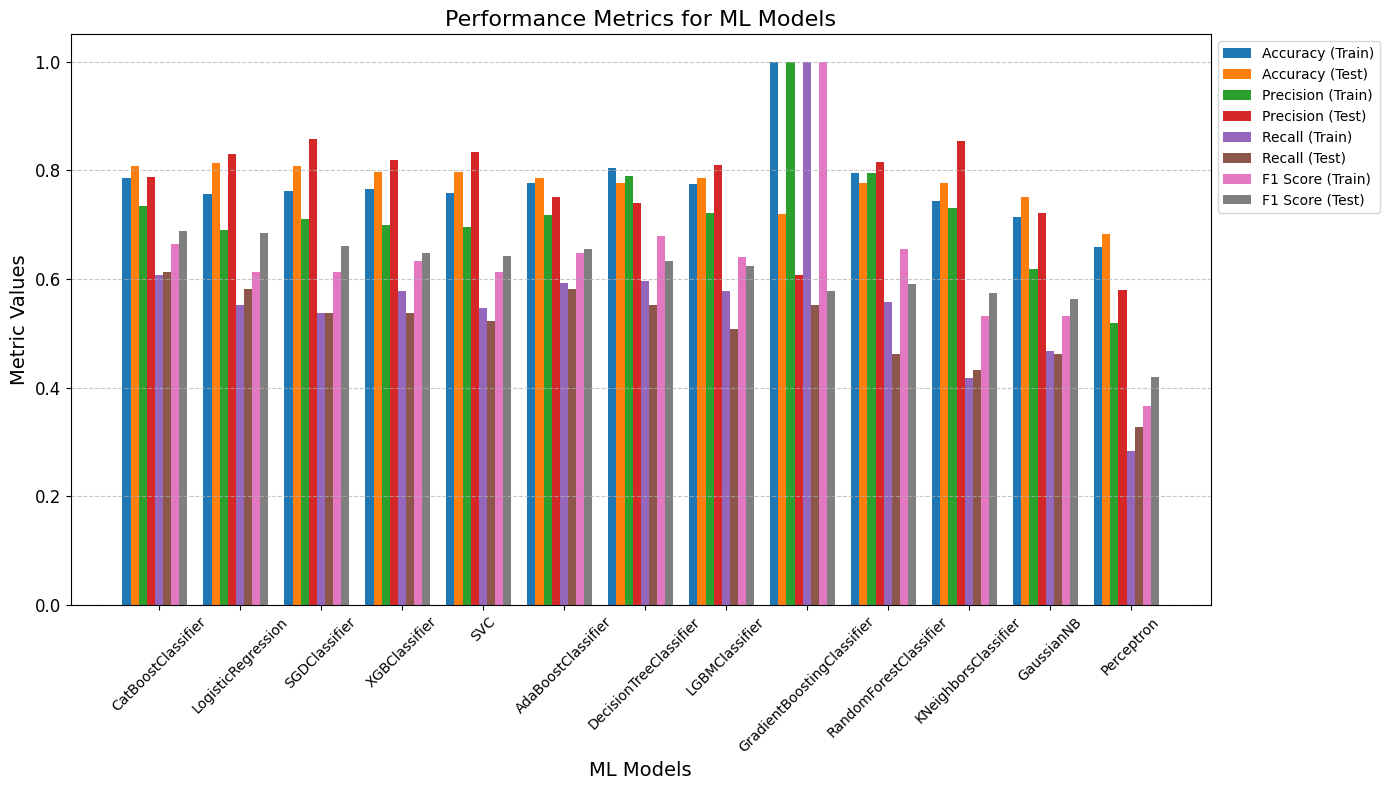

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming metrics_df is a DataFrame that contains the data
# Replace the below line with an appropriate filter or use metrics_df directly if no filtering is needed
df = metrics_df  # Ensure `metrics_df` is already prepared

# Metrics to plot
metrics = [
    "Accuracy (Train)", "Accuracy (Test)",
    "Precision (Train)", "Precision (Test)",
    "Recall (Train)", "Recall (Test)",
    "F1 Score (Train)", "F1 Score (Test)"
]

# Define figure size
plt.figure(figsize=(14, 8))

# Calculate bar width and positions
bar_width = 0.1
x_positions = np.arange(len(df["ML name"]))

# Create bars for each metric
for i, metric in enumerate(metrics):
    if metric in df.columns:  # Ensure metric exists in the DataFrame
        plt.bar(
            x_positions + i * bar_width,
            df[metric],
            width=bar_width,
            label=metric
        )
    else:
        print(f"Metric '{metric}' not found in DataFrame columns.")

# Customizing the plot
plt.title("Performance Metrics for ML Models", fontsize=16)
plt.xlabel("ML Models", fontsize=14)
plt.ylabel("Metric Values", fontsize=14)
plt.xticks(x_positions + (bar_width * len(metrics) / 2), df["ML name"], fontsize=10, rotation=45)
plt.yticks(fontsize=12)
plt.legend(loc="upper left", fontsize=10, bbox_to_anchor=(1, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


In [46]:
import plotly.graph_objects as go
import pandas as pd
import plotly.io as pio
pio.renderers.default = 'browser'  # Opens plots in the default web browser
# Create a figure
fig = go.Figure()

# Add traces for each metric
metrics = [
    "Accuracy (Train)", "Accuracy (Test)",
    "Precision (Train)", "Precision (Test)",
    "Recall (Train)", "Recall (Test)",
    "F1 Score (Train)", "F1 Score (Test)"
]

for metric in metrics:
    fig.add_trace(
        go.Bar(
            x=metrics_df["ML name"],
            y=metrics_df[metric],
            name=metric
        )
    )

# Update layout to include dropdown for filtering
fig.update_layout(
    title="Performance Metrics for ML Models",
    xaxis=dict(title="ML Models"),
    yaxis=dict(title="Metric Values"),
    updatemenus=[
        {
            "buttons": [
                {
                    "label": metric,
                    "method": "update",
                    "args": [
                        {"visible": [metric == m for m in metrics]},
                        {"title": f"Performance Metrics: {metric}"}
                    ]
                }
                for metric in metrics
            ],
            "direction": "down",
            "showactive": True,
        }
    ]
)

# Show the figure
fig.show()

## Unsupervised learning Algorythms

### Clustering

#### Data

In [6]:
# https://www.kaggle.com/code/berkayalan/unsupervised-learning-clustering-complete-guide
df_uns = read_file()

In [7]:
df_uns.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#### Insulin Analysis

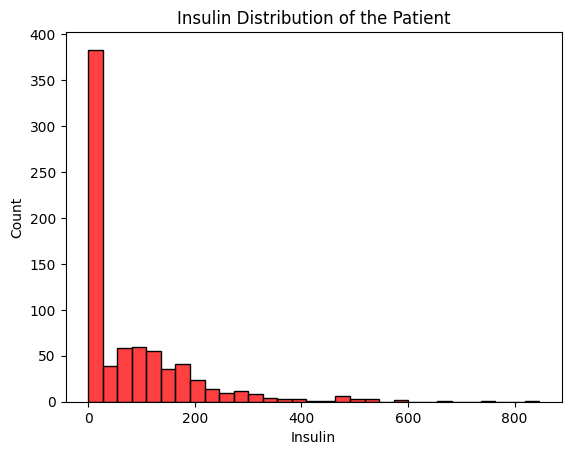

In [8]:
plt.Figure(figsize=(12,6), dpi=200)
sns.histplot(data=df_uns,x="Insulin", color ="red")
plt.title("Insulin Distribution of the Patient")
plt.show()

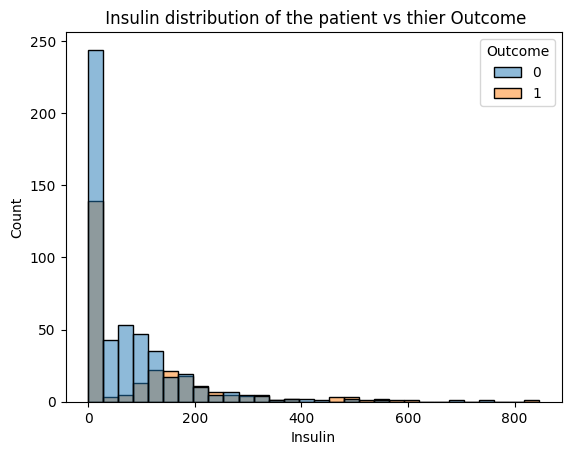

In [9]:
# We also want to see if there is between Insulin and Outcome status of Patient.
plt.Figure(figsize=(6,12),dpi=200)
sns.histplot(data = df_uns, x="Insulin" , hue= "Outcome" , bins=30)
plt.title(" Insulin distribution of the patient vs thier Outcome")
plt.show()

#### Scalling Data before apply kmeans

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_uns)
print(type(df_scaled))

<class 'numpy.ndarray'>


#### K means

In [11]:
from sklearn.cluster import KMeans, AgglomerativeClustering , DBSCAN
k_mean_model = KMeans(n_clusters=7) # After check te elbow method
cluster_labels = k_mean_model.fit_predict(df_scaled)

  File "C:\Users\ASUS TUF\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [12]:
df_uns["cluster"]= cluster_labels

In [13]:
df_uns.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,cluster
0,6,148,72,35,0,33.6,0.627,50,1,4
1,1,85,66,29,0,26.6,0.351,31,0,1
2,8,183,64,0,0,23.3,0.672,32,1,2
3,1,89,66,23,94,28.1,0.167,21,0,1
4,0,137,40,35,168,43.1,2.288,33,1,3


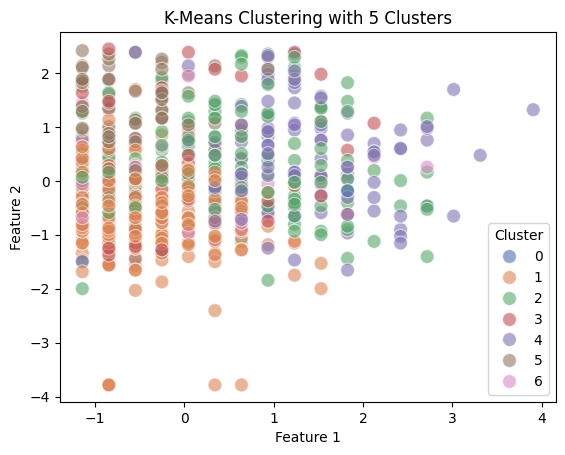

In [14]:
# Plotting the clusters
sns.scatterplot(x=df_scaled[:, 0], y=df_scaled[:, 1], hue=cluster_labels, palette="deep", s=100, alpha=0.6)
plt.title("K-Means Clustering with 5 Clusters")
plt.xlabel("Feature 1")  # Update with actual feature name if needed
plt.ylabel("Feature 2")  # Update with actual feature name if needed
plt.legend(title="Cluster")
plt.show()

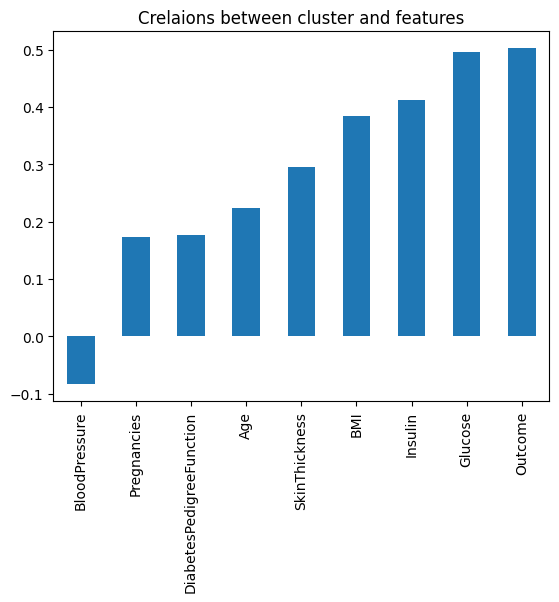

In [15]:
plt.Figure(figsize=(12,6), dpi=200)
df_uns.corr()['cluster'].iloc[:-1].sort_values().plot(kind="bar")
plt.title("Crelaions between cluster and features")
plt.show()

##### Kmeans as feature engineering 

In [16]:
df_uns= pd.get_dummies(df_uns, columns=['cluster'], drop_first=True).astype(int)

In [39]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
bins=[20,36,51,66,float('inf')]  # Define bin edges
labels=['Young Adults','Middle-Aged Adults','Older Adults','Seniors']  # Define labels
df_uns['Age_Category']=pd.cut(df_uns['Age'],bins=bins,labels=labels, right=True)
df_uns['Age_Category']=pd.cut(df_uns['Age'],bins=bins,labels=labels, right=True)
# Initialize the encoder
on = OrdinalEncoder()

le=LabelEncoder()
df_uns['Age_Category']=le.fit_transform(df_uns['Age_Category']) # Encoding categorical column
df_uns['Normalized_Age'] = (df_uns['Age'] - df_uns['Age'].min()) / (df_uns['Age'].max() - df_uns['Age'].min())


df_uns=add_stat_columns(df_uns)




In [40]:
df_uns.drop(columns=['cluster_1_min', 'cluster_1_max', 'cluster_1_mean','cluster_1_sd','cluster_2_min', 'cluster_2_max', 'cluster_2_mean','cluster_2_sd','cluster_3_min', 'cluster_3_max', 'cluster_3_mean','cluster_3_sd','cluster_4_min', 'cluster_4_max', 'cluster_4_mean','cluster_4_sd','cluster_5_min', 'cluster_5_max', 'cluster_5_mean','cluster_5_sd','cluster_6_min', 'cluster_6_max', 'cluster_6_mean','cluster_6_sd'], inplace=True)

In [41]:
from sklearn.model_selection import train_test_split
x= df_uns.drop(columns='Outcome')
y= df_uns['Outcome']
x_t,x_te,y_t,y_te= train_test_split(x,y,test_size=.25,random_state=20, stratify=y)

In [53]:
num_pipeline = Pipeline([
        ('outlier_remover', OutlierReplaceWithMedian(cols=[0, 2, 4, 5, 6, 7, 8, 9], threshold=1.5)),
        #('inputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()
         )
])

X_train_scaler = num_pipeline.fit_transform(x_t)
X_test_scaler = num_pipeline.fit_transform(x_te)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import RandomizedSearchCV
reg=LogisticRegression(max_iter=10000) 
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
#nreg.fit(x_t,y_t)
nreg.fit(X_train_scaler,y_t)
print(nreg.best_params_)
print(nreg.best_score_)
nregg=nreg.best_estimator_
predt1=nregg.predict(X_train_scaler)
pred1=nregg.predict(X_test_scaler)
lm.append("LogisticRegression_with_Kmeans_Cluster")
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

{'solver': 'liblinear', 'penalty': 'l2', 'C': 8}
0.8679673321234119


In [55]:
acc

[0.9270833333333334]

##### Evaluation of K means

In [17]:
ssd = []

for k in range(2,10):
    model = KMeans(n_clusters=k)
    model.fit(df_uns)
    
    ssd.append(model.inertia_) ## SSD Point to cluster centers

In [18]:
ssd

[5142757.344851501,
 2913731.541970659,
 2151686.0017771265,
 1842818.326340352,
 1571201.9260256132,
 1323751.4833491936,
 1164805.6433413504,
 1002097.9484180323]

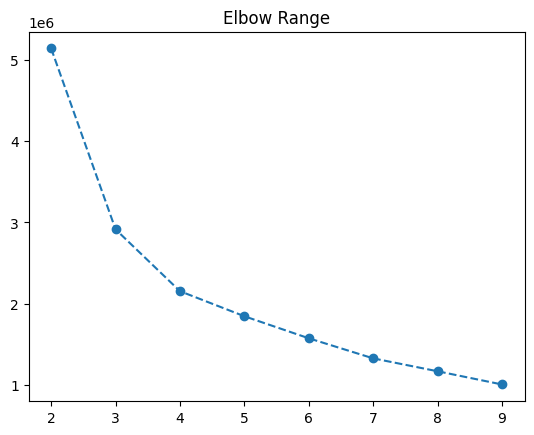

In [19]:
plt.plot(range(2,10),ssd,"o--")
plt.title("Elbow Range")
plt.show()

In [20]:
pd.Series(ssd).diff()

0             NaN
1   -2.229026e+06
2   -7.620455e+05
3   -3.088677e+05
4   -2.716164e+05
5   -2.474504e+05
6   -1.589458e+05
7   -1.627077e+05
dtype: float64

In [25]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_scaled, k_mean_model.labels_)
silhouette_avg

0.20063549203558848

##### Hypertuning of K means

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_clusters' :[2,3,4,5,6,7],
    'init'  : ['K-means++','random'],
    'max_iter' : [100,200,300],
    'n_init'  : [10,20]
    
 }

kmeans = KMeans()

grdi_searc = GridSearchCV(kmeans,param_grid,cv=5)
grdi_searc.fit(df_scaled)
print(grdi_searc.best_estimator_)
best_kmeans = grdi_searc.best_estimator_
predictions = best_kmeans.predict(df_scaled)


KMeans(init='random', n_clusters=7, n_init=10)


In [24]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_scaled, k_mean_model.labels_)
silhouette_avg

0.20063549203558848

#### Hierarchical Methods

In [3]:
# https://www.kaggle.com/code/berkayalan/unsupervised-learning-clustering-complete-guide
df_hc = read_file()

In [4]:
df_hc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_hc)
print(type(df_scaled))

<class 'numpy.ndarray'>


In [8]:
z = linkage(df_scaled, method= 'complete') # the linkage criterion 'complete' computes the distances between the clusters given the largest distance observed between point pairs of diffferent clusters.

In [9]:
z

array([[2.26000000e+02, 7.58000000e+02, 4.06051114e-01, 2.00000000e+00],
       [8.10000000e+01, 4.94000000e+02, 4.13201351e-01, 2.00000000e+00],
       [4.11000000e+02, 7.26000000e+02, 4.15839526e-01, 2.00000000e+00],
       ...,
       [1.48700000e+03, 1.53100000e+03, 1.06840784e+01, 7.11000000e+02],
       [1.52500000e+03, 1.53200000e+03, 1.13958789e+01, 7.28000000e+02],
       [1.52900000e+03, 1.53300000e+03, 1.23920668e+01, 7.68000000e+02]])

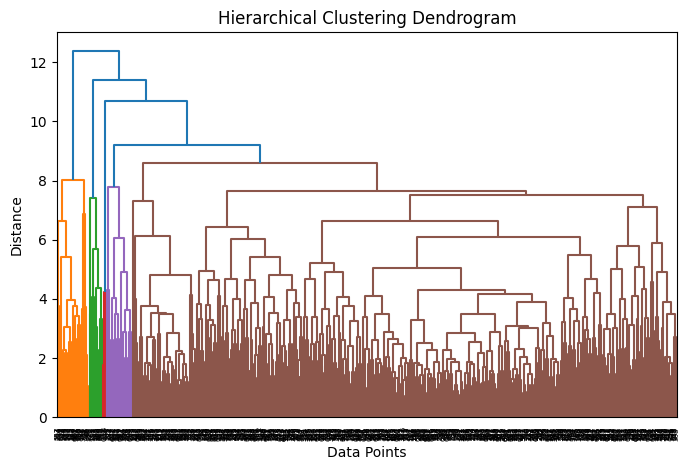

In [10]:
plt.figure(figsize=(8,5))
dendrogram(z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [11]:
max_distance = 10  # at distance=10 (see plot) we obtain 3 cluters.
clusters = fcluster(z, max_distance, criterion='distance')

df['hierarchical_clusters'] = clusters
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,hierarchical_clusters
763,10,101,76,48,180,32.9,0.171,63,0,4
764,2,122,70,27,0,36.8,0.340,27,0,4
765,5,121,72,23,112,26.2,0.245,30,0,4
766,1,126,60,0,0,30.1,0.349,47,1,4
767,1,93,70,31,0,30.4,0.315,23,0,4


##### Hypertuning 

In [12]:
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

In [14]:
# List of methods and metrics to explore
linkage_methods = ['single', 'complete', 'average', 'ward']
distance_metrics = ['euclidean', 'cosine', 'correlation']
scalers = [StandardScaler(), MinMaxScaler()]

# Preprocess and tune
best_score = -1
best_params = {}
for scaler in scalers:
    # Scale the data
    df_scaled = scaler.fit_transform(df_hc)
    
    for method in linkage_methods:
        for metric in distance_metrics:
            try:
                # Compute the distance matrix
                distance_matrix = pdist(df_scaled, metric=metric)
                
                # Perform linkage
                z = linkage(distance_matrix, method=method)
                
                # Silhouette score as an evaluation metric
                clusters = pd.Series(
                    fcluster(z, t=3, criterion='maxclust')  # Adjust `t` as needed
                )
                score = silhouette_score(df_scaled, clusters, metric=metric)
                
                # Update best parameters
                if score > best_score:
                    best_score = score
                    best_params = {
                        'scaler': scaler.__class__.__name__,
                        'method': method,
                        'metric': metric
                    }
            except Exception as e:
                # Handle cases where some combinations may not work
                print(f"Error with method={method}, metric={metric}: {e}")

print(f"Best Silhouette Score: {best_score}")
print(f"Best Parameters: {best_params}")

Best Silhouette Score: 0.6773895719848181
Best Parameters: {'scaler': 'MinMaxScaler', 'method': 'average', 'metric': 'cosine'}


In [15]:
minscaler = MinMaxScaler()
df_scaled1 = minscaler.fit_transform(df_hc)
print(type(df_scaled1))

<class 'numpy.ndarray'>


In [16]:
best_params

{'scaler': 'MinMaxScaler', 'method': 'average', 'metric': 'cosine'}

In [17]:
# Perform linkage using the best method
z_hyper = linkage(df_scaled1, method='average',metric='cosine')

In [25]:
z_hyper

array([[4.11000000e+02, 7.26000000e+02, 6.79213469e-04, 2.00000000e+00],
       [1.56000000e+02, 5.30000000e+02, 8.89777367e-04, 2.00000000e+00],
       [5.15000000e+02, 6.96000000e+02, 1.04133392e-03, 2.00000000e+00],
       ...,
       [1.52700000e+03, 1.53000000e+03, 2.79093984e-01, 4.83000000e+02],
       [1.52800000e+03, 1.53200000e+03, 3.23226976e-01, 7.51000000e+02],
       [1.53100000e+03, 1.53300000e+03, 3.84664425e-01, 7.68000000e+02]])

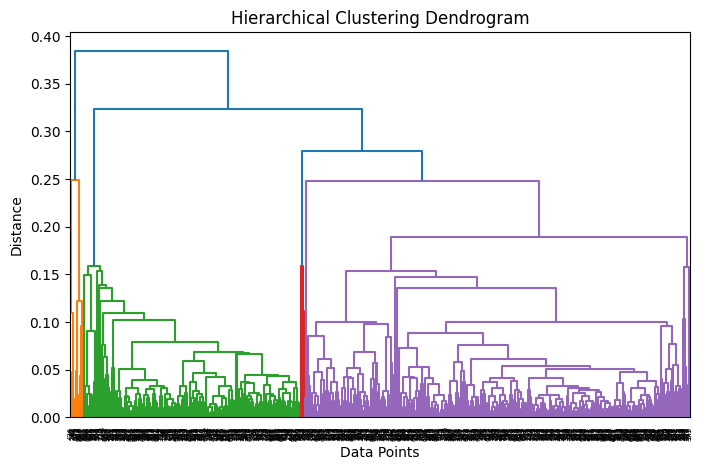

In [18]:
plt.figure(figsize=(8,5))
dendrogram(z_hyper)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

In [29]:
# Here, we're using a maximum distance threshold (t=0.5) to form clusters
cluster_labels = fcluster(z_hyper, t=0.2, criterion='distance')


df_hc['hierarchical_clusters'] = cluster_labels
df_hc.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,hierarchical_clusters
763,10,101,76,48,180,32.9,0.171,63,0,6
764,2,122,70,27,0,36.8,0.340,27,0,6
765,5,121,72,23,112,26.2,0.245,30,0,6
766,1,126,60,0,0,30.1,0.349,47,1,3
767,1,93,70,31,0,30.4,0.315,23,0,6


In [30]:
df_hc['hierarchical_clusters'].value_counts()

hierarchical_clusters
6    474
3    268
2     11
1      6
4      6
5      3
Name: count, dtype: int64

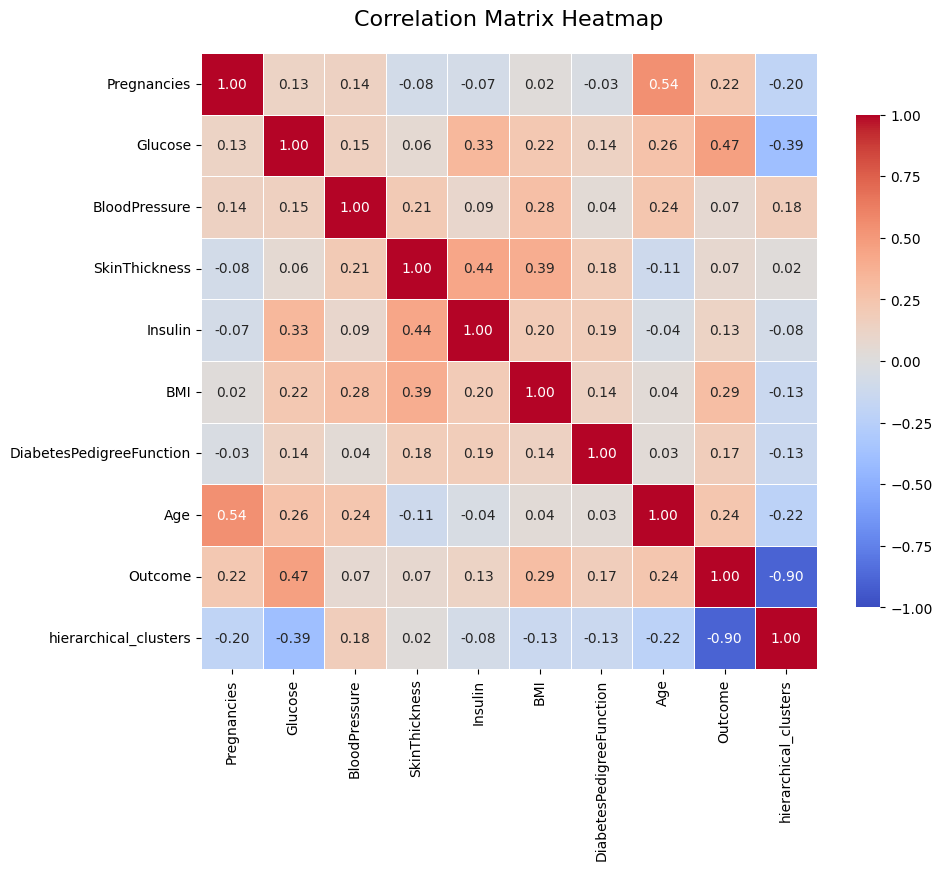

In [31]:
# Compute the correlation matrix
corr_matrix = df_hc.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,        # Annotate cells with correlation values
    fmt=".2f",         # Format for numbers
    cmap='coolwarm',   # Colormap
    vmin=-1, vmax=1,   # Value range
    square=True,       # Make cells square
    linewidths=0.5,    # Add grid lines
    cbar_kws={'shrink': 0.8}  # Colorbar options
)

# Add a title
plt.title("Correlation Matrix Heatmap", fontsize=16, pad=20)

# Show the plot
plt.show()

##### HDC as feature engineering 

In [33]:
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
bins=[20,36,51,66,float('inf')]  # Define bin edges
labels=['Young Adults','Middle-Aged Adults','Older Adults','Seniors']  # Define labels
df_hc['Age_Category']=pd.cut(df_hc['Age'],bins=bins,labels=labels, right=True)
df_hc['Age_Category']=pd.cut(df_hc['Age'],bins=bins,labels=labels, right=True)
# Initialize the encoder
on = OrdinalEncoder()

le=LabelEncoder()
df_hc['Age_Category']=le.fit_transform(df_hc['Age_Category']) # Encoding categorical column
df_hc['Normalized_Age'] = (df_hc['Age'] - df_hc['Age'].min()) / (df_hc['Age'].max() - df_hc['Age'].min())





In [34]:
df_hc=add_stat_columns(df_hc)

In [36]:
from sklearn.model_selection import train_test_split
x= df_hc.drop(columns='Outcome')
y= df_hc['Outcome']
x_t,x_te,y_t,y_te= train_test_split(x,y,test_size=.25,random_state=20, stratify=y)




In [ ]:

num_pipeline = Pipeline([
        ('outlier_remover', OutlierReplaceWithMedian(cols=[0, 2, 4, 5, 6, 7, 8, 9], threshold=1.5)),
        #('inputer', SimpleImputer(strategy='median')),
        ('std_scaler', StandardScaler()
         )
])



In [40]:
X_train_scaler = x_t
X_test_scaler = x_te
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,f1_score
from sklearn.model_selection import RandomizedSearchCV
reg=LogisticRegression(max_iter=1000) 
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
#nreg.fit(x_t,y_t)
nreg.fit(X_train_scaler,y_t)
print(nreg.best_params_)
print(nreg.best_score_)
nregg=nreg.best_estimator_
predt1=nregg.predict(X_train_scaler)
pred1=nregg.predict(X_test_scaler)
lm.append("LogisticRegression_with_Kmeans_Cluster")
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))


{'solver': 'liblinear', 'penalty': 'l2', 'C': 8}
0.9722625529340594


In [41]:
acc

[0.9739583333333334]

#### DBscan methode

In [42]:
df_db = read_file()

### Dimension reduction

In [ ]:
# Merge bewteen Kmeans and PCA
# https://www.kaggle.com/code/yeahian/country-data-k-means

## Baggin Satking votin

In [139]:
reg=LogisticRegression(max_iter=100) 
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,10))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
from sklearn.svm import SVC 
svc = SVC()
params={"C" : [0.1, 1, 10, 100] ,"kernel":['linear', 'rbf', 'poly'],"degree" : [0, 1, 2, 3, 4, 5, 6],"gamma":[0.1, 1, 10, 100]}
svcc=RandomizedSearchCV(svc,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
from sklearn.naive_bayes import GaussianNB
gauss = GaussianNB()
params={'var_smoothing': np.logspace(0,-9, num=100)}
gaussh=RandomizedSearchCV(gauss,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
from sklearn.linear_model import Perceptron
per = Perceptron()
params={'max_iter': [40], 'eta0':[0.1], 'random_state':[1]}
perh=RandomizedSearchCV(per,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
knn=KNeighborsClassifier() 
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
sgd = SGDClassifier(max_iter=10000, random_state=42)
params = {
    'loss': ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': list(np.logspace(-4, 0, 20)),  # Regularization strength
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
    'eta0': list(np.logspace(-3, 0, 10))  # Initial learning rate
}
nsgd = RandomizedSearchCV(sgd, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
tree = DecisionTreeClassifier(random_state=42)
params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': list(range(1, 21)),
    'min_samples_split': list(range(2, 11)),
    'min_samples_leaf': list(range(1, 11))
}
ntree = RandomizedSearchCV(tree, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)
forest = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': list(range(50, 201, 50)),  # Number of trees
    'max_depth': list(range(1, 21)),  # Maximum depth of the trees
    'min_samples_split': list(range(2, 11)),  # Minimum samples required to split a node
    'min_samples_leaf': list(range(1, 11)),  # Minimum samples required in a leaf node
    'criterion': ['gini', 'entropy']  # Split criterion
}
nforest = RandomizedSearchCV(forest, param_distributions=params, scoring='accuracy', n_jobs=-1, cv=10, random_state=42)



In [140]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

In [141]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

def bagging_predictions(estimator, X_train, y_train, X_test, y_test, n_jobs=-1, random_state=None):
    """
    Perform bagging using a base classifier and evaluate on test data.

    Parameters:
    ----------
    estimator: object
        The base classifier from which the ensemble is grown.
    X_train: array-like
        Training features.
    y_train: array-like
        Training labels.
    X_test: array-like
        Test features.
    y_test: array-like
        Test labels.
    n_jobs: int, default=-1
        The number of jobs to run in parallel for `fit`.
    random_state: int, default=None
        Controls the randomness of the estimator.

    Returns:
    -------
    br_y_pred: array
        Predictions on test data for the base classifier.
    """

    # Create the BaggingClassifier with the base estimator
    clf = BaggingClassifier(estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True,  # Samples are drawn with replacement
                            n_jobs=n_jobs,
                            random_state=random_state)
    
    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    br_y_pred = clf.predict(X_test)
    br_y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluate model performance
    accuracy = accuracy_score(y_test, br_y_pred)
    print(f"Accuracy for base estimator {clf.estimator_}: {accuracy:.4f}")

    if br_y_prob is not None:
        auc = roc_auc_score(y_test, br_y_prob)
        print(f"AUC-ROC for base estimator {clf.estimator_}: {auc:.4f}")
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, br_y_pred))

    return br_y_pred


In [142]:
from sklearn.metrics import accuracy_score

# Stack predictions from different classifiers
predictions = np.column_stack((
    bagging_predictions(nreg,X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123),
    bagging_predictions(gaussh,X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123),
    bagging_predictions(svcc,X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123),
    bagging_predictions(nknn,X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123),
     
))


print(f"Bagged predictions shape: {predictions.shape}")

# Aggregate predictions using majority voting
y_pred = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=1, arr=predictions)
print("Aggregated predictions (y_pred) shape:", y_pred.shape)

# Evaluate the aggregated predictions
accuracy = accuracy_score(y_te, y_pred)


print(f'\nBagging Accuracy = {accuracy:.4f}')


# Metrics calculation
lm.append("bagging")
cr.append(classification_report(y_te, pred1))
cm_t.append(confusion_matrix(y_t, predt1))
cm.append(confusion_matrix(y_te, pred1))
acc_t.append(accuracy_score(y_t, predt1))
acc.append(accuracy_score(y_te, pred1))
p_t.append(precision_score(y_t, predt1))
p.append(precision_score(y_te, pred1))
r_t.append(recall_score(y_t, predt1))
r.append(recall_score(y_te, pred1))
f1_t.append(f1_score(y_t, predt1))
f1.append(f1_score(y_te, pred1))


Accuracy for base estimator RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   random_state=42, scoring='accuracy'): 0.8073
AUC-ROC for base estimator RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   random_state=42, scoring='accuracy'): 0.8688

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.87       125
           1       0.86      0.54      0.66        67

    accuracy                           0.81       192
   macro av

KeyboardInterrupt: 

In [97]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

def bagging_predictions(estimator, X_train, y_train, X_test, y_test, n_jobs=-1, random_state=None):
    """
    Perform bagging using a base classifier and evaluate on test data.

    Parameters:
    ----------
    estimator: object
        The base classifier from which the ensemble is grown.
    X_train: array-like
        Training features.
    y_train: array-like
        Training labels.
    X_test: array-like
        Test features.
    y_test: array-like
        Test labels.
    n_jobs: int, default=-1
        The number of jobs to run in parallel for `fit`.
    random_state: int, default=None
        Controls the randomness of the estimator.

    Returns:
    -------
    br_y_pred: array
        Predictions on test data for the base classifier.
    """

    # Create the BaggingClassifier with the base estimator
    clf = BaggingClassifier(estimator=estimator,
                            n_estimators=10,
                            max_samples=1.0,
                            bootstrap=True,  # Samples are drawn with replacement
                            n_jobs=n_jobs,
                            random_state=random_state)
    
    # Fit the model on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the test data
    br_y_pred = clf.predict(X_test)
    br_y_prob = clf.predict_proba(X_test)[:, 1] if hasattr(clf, "predict_proba") else None

    # Evaluate model performance
    accuracy = accuracy_score(y_test, br_y_pred)
    print(f"Accuracy for base estimator {clf.estimator_}: {accuracy:.4f}")

    if br_y_prob is not None:
        auc = roc_auc_score(y_test, br_y_prob)
        print(f"AUC-ROC for base estimator {clf.estimator_}: {auc:.4f}")
    
    # Display classification report
    print("\nClassification Report:")
    print(classification_report(y_test, br_y_pred))

    # Calculate additional metrics
    pred1 = br_y_pred
    predt1 = clf.predict(X_train)  # predictions on train set
    lm.append("bagging")
    cr.append(classification_report(y_test, pred1))
    cm_t.append(confusion_matrix(y_train, predt1))
    cm.append(confusion_matrix(y_test, pred1))
    acc_t.append(accuracy_score(y_train, predt1))
    acc.append(accuracy_score(y_test, pred1))
    p_t.append(precision_score(y_train, predt1))
    p.append(precision_score(y_test, pred1))
    r_t.append(recall_score(y_train, predt1))
    r.append(recall_score(y_test, pred1))
    f1_t.append(f1_score(y_train, predt1))
    f1.append(f1_score(y_test, pred1))

    return br_y_pred


In [100]:
# Assuming you have defined nreg, gaussh, svcc, nknn, and your data (X_train_scaler, y_t, X_test_scaler, y_te)

# Call bagging_predictions for each classifier
bagging_predictions(nreg, X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(gaussh, X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(svcc, X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(nknn, X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(nsgd, X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(tree , X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)
bagging_predictions(nforest , X_train_scaler, y_t, X_test_scaler, y_te, n_jobs=-1, random_state=123)


Accuracy for base estimator RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   random_state=42, scoring='accuracy'): 0.8021
AUC-ROC for base estimator RandomizedSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['saga', 'liblinear']},
                   random_state=42, scoring='accuracy'): 0.8693

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.95      0.86       125
           1       0.85      0.52      0.65        67

    accuracy                           0.80       192
   macro av

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [52]:
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
# Create the StackingClassifier
models_scores = []
estimators = [
    ('nreg', nreg),  # Replace `model1` with your classifier
    ('gaussh', gaussh),
     ('svcc',svcc),
     ('nknn',nknn),  # Replace `model2` with another classifier
]
final_estimator = gaussh
n_jobs = -1
stack = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5, n_jobs=n_jobs, passthrough=True)

# Fit the stacking model
stack.fit(X_train_scaler, y_t)

# Predict probabilities and class labels for evaluation
y_pred_proba = stack.predict_proba(X_test_scaler)[:, 1]  # Probabilities for the positive class
y_pred = stack.predict(X_test_scaler)  # Predicted class labels

# Evaluate the model
accuracy = accuracy_score(y_te, y_pred)
roc_auc = roc_auc_score(y_te, y_pred_proba)

# Store the results
models_scores.append(['Stacking', accuracy, roc_auc])

# Print the results
print(f'Accuracy: {accuracy:.4f}')
print(f'ROC AUC: {roc_auc:.4f}')

Accuracy: 0.7552
ROC AUC: 0.8461


## Sklearn Model app using Taipy

## Models

In [ ]:
# https://blog.dailydoseofds.com/p/taipy-scikit-learn-app